In [1]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [33]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('images') if isfile(join('images', f))])

In [105]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # Find contours
    kernel_horizontal_derivative = 1/4 * np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    image_horizontal_derivative = cv2.filter2D(gray, -1, kernel_horizontal_derivative)
    image_horizontal_derivative = np.abs(image_horizontal_derivative)
    kernel_vertical_derivative = 1/4 * np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    image_vertical_derivative = cv2.filter2D(gray, -1, kernel_vertical_derivative)
    image_vertical_derivative = np.abs(image_vertical_derivative)

    image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(image_derivative,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    """kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    opened1 = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)"""
    
    kernel = np.zeros((11,11),np.uint8)
    kernel[5,:] = 1
    dilated = cv2.dilate(closed, kernel, iterations = 5)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 402.  261.]
 [1298.  257.]
 [ 407. 1133.]
 [1302. 1129.]]


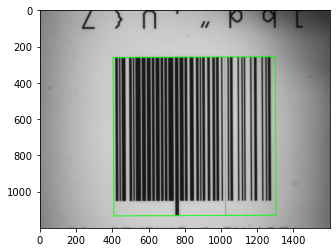

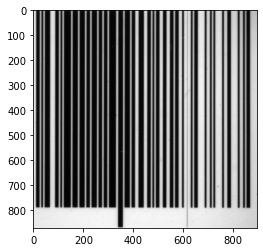

In [106]:
bound_box(f'images/{images_paths[0]}')

[[ 351.  288.]
 [1251.  288.]
 [ 351. 1086.]
 [1251. 1086.]]


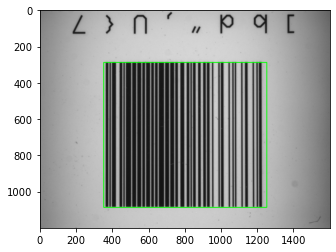

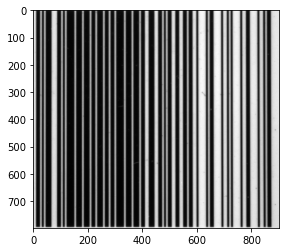

In [107]:
bound_box(f'images/{images_paths[1]}')

[[ 200.  243.]
 [1046.  237.]
 [ 204.  769.]
 [1050.  763.]]


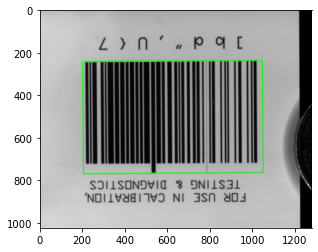

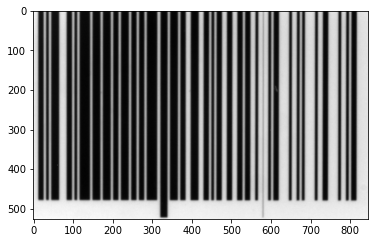

In [108]:
bound_box(f'images/{images_paths[2]}')

[[130. 257.]
 [976. 257.]
 [130. 741.]
 [976. 741.]]


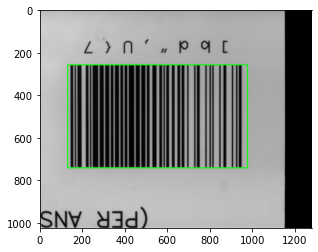

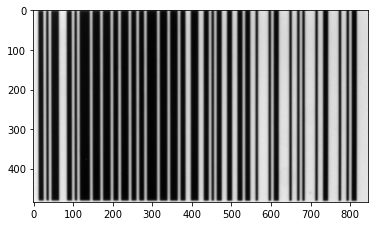

In [109]:
bound_box(f'images/{images_paths[3]}')

[[328. 172.]
 [908. 172.]
 [328. 733.]
 [908. 733.]]


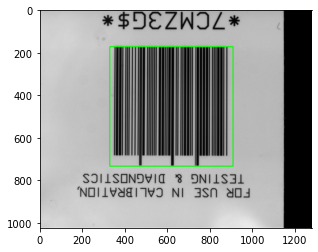

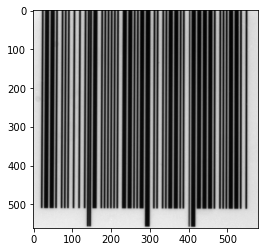

In [110]:
bound_box(f'images/{images_paths[4]}')

[[333. 251.]
 [916. 251.]
 [333. 765.]
 [916. 765.]]


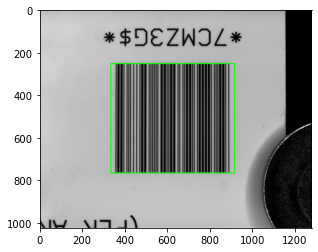

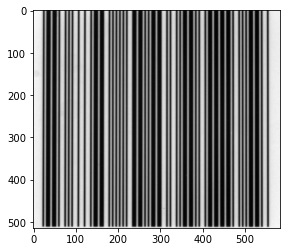

In [111]:
bound_box(f'images/{images_paths[5]}')

[[ 158.  288.]
 [1106.  285.]
 [ 160.  849.]
 [1107.  847.]]


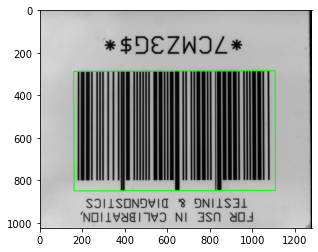

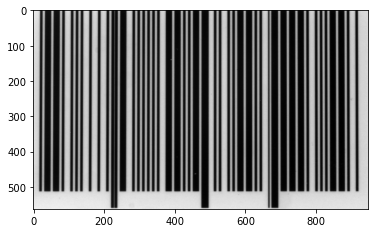

In [112]:
bound_box(f'images/{images_paths[6]}')

[[ 145.  274.]
 [1097.  276.]
 [ 144.  789.]
 [1096.  791.]]


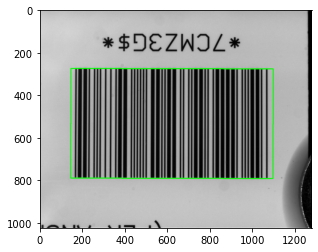

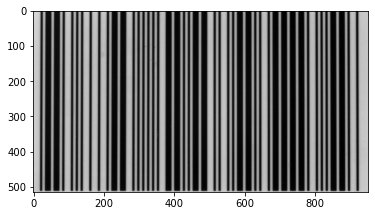

In [113]:
bound_box(f'images/{images_paths[7]}')

[[326. 335.]
 [981. 341.]
 [321. 780.]
 [976. 786.]]


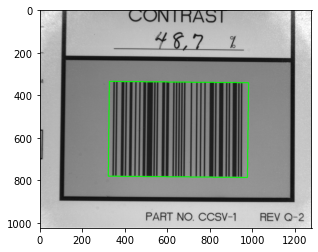

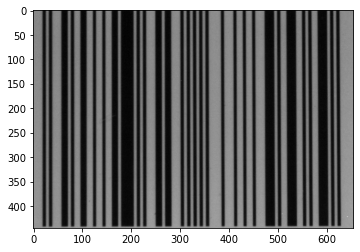

In [114]:
bound_box(f'images/{images_paths[8]}')

[[337. 255.]
 [986. 263.]
 [331. 721.]
 [980. 729.]]


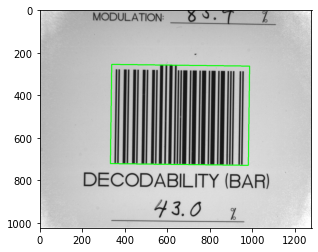

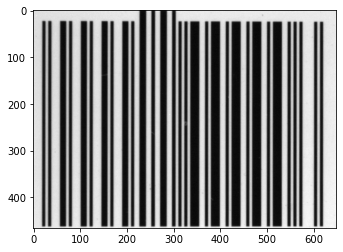

In [115]:
bound_box(f'images/{images_paths[9]}')

In [44]:
print(f'images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [45]:
bound_box(f'images/{images_paths[10]}')

ValueError: min() arg is an empty sequence

[[261. 284.]
 [961. 282.]
 [262. 758.]
 [962. 756.]]


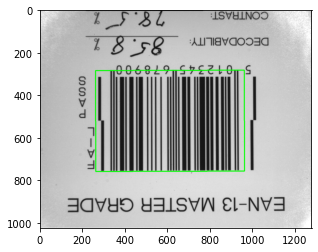

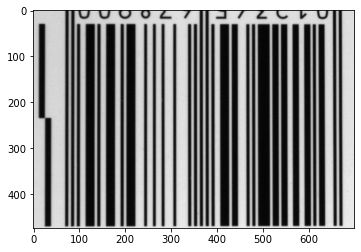

In [116]:
bound_box(f'images/{images_paths[11]}')

In [47]:
bound_box(f'images/{images_paths[12]}')

ValueError: min() arg is an empty sequence

[[ 100.  120.]
 [1300.  120.]
 [ 100.  312.]
 [1300.  312.]]


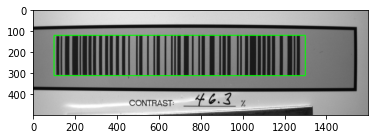

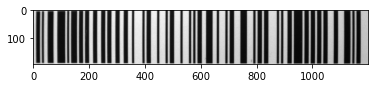

In [117]:
bound_box(f'images/{images_paths[13]}')

[[ 163.  146.]
 [1358.  146.]
 [ 163.  338.]
 [1358.  338.]]


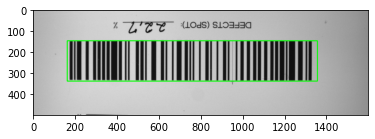

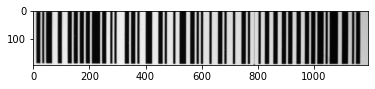

In [118]:
bound_box(f'images/{images_paths[14]}')

[[ 178.  148.]
 [1391.  139.]
 [ 180.  361.]
 [1392.  352.]]


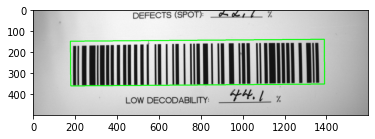

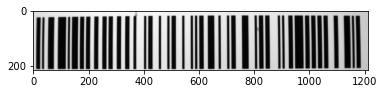

In [119]:
bound_box(f'images/{images_paths[15]}')

[[ 201.  140.]
 [1397.  141.]
 [ 201.  332.]
 [1397.  332.]]


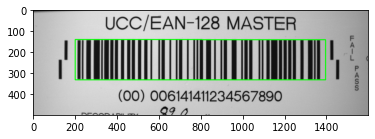

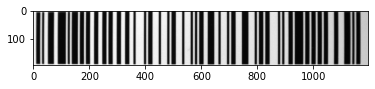

In [120]:
bound_box(f'images/{images_paths[16]}')

[[ 192.  144.]
 [1358.  125.]
 [ 196.  386.]
 [1362.  367.]]


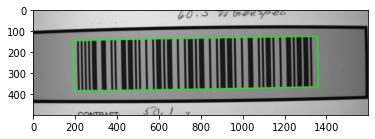

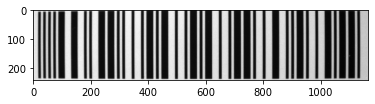

In [121]:
bound_box(f'images/{images_paths[17]}')

[[ 196.  123.]
 [1365.  123.]
 [ 196.  377.]
 [1365.  377.]]


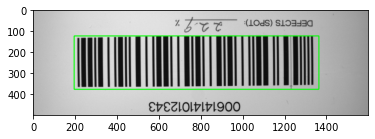

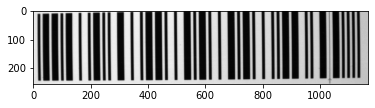

In [122]:
bound_box(f'images/{images_paths[18]}')

[[ 227.   58.]
 [1393.   59.]
 [ 226.  298.]
 [1392.  300.]]


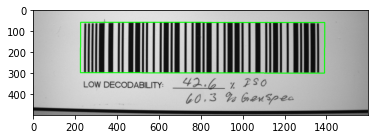

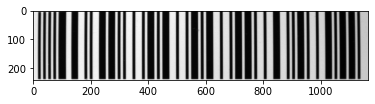

In [123]:
bound_box(f'images/{images_paths[19]}')

[[ 245.  141.]
 [1414.  131.]
 [ 247.  383.]
 [1416.  373.]]


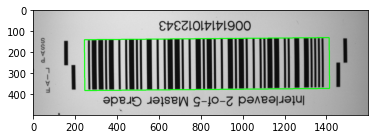

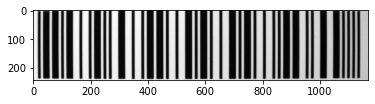

In [124]:
bound_box(f'images/{images_paths[20]}')

In [100]:
print(f'images/{images_paths[21]}')

images/TestChart.xls


In [99]:
bound_box(f'images/{images_paths[21]}')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


[[177. 213.]
 [894. 207.]
 [180. 645.]
 [898. 639.]]


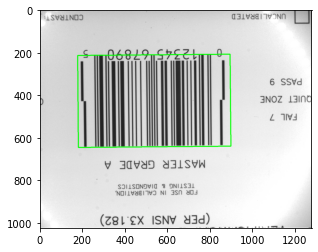

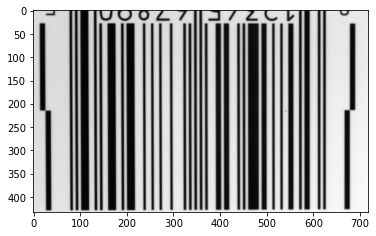

In [125]:
bound_box(f'images/{images_paths[22]}')

[[308. 306.]
 [903. 312.]
 [303. 737.]
 [899. 742.]]


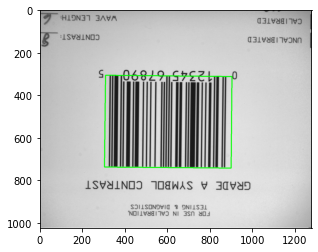

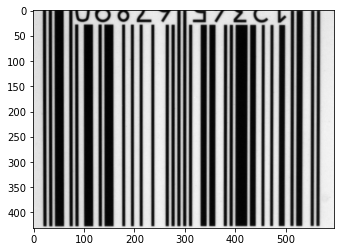

In [126]:
bound_box(f'images/{images_paths[23]}')

[[341. 302.]
 [934. 312.]
 [334. 732.]
 [927. 742.]]


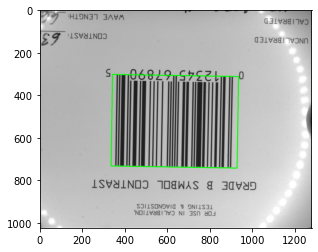

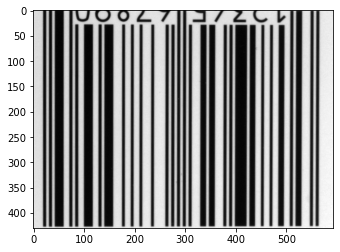

In [127]:
bound_box(f'images/{images_paths[24]}')

[[348. 306.]
 [942. 306.]
 [348. 736.]
 [942. 736.]]


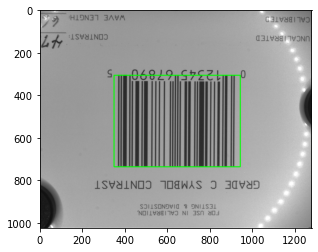

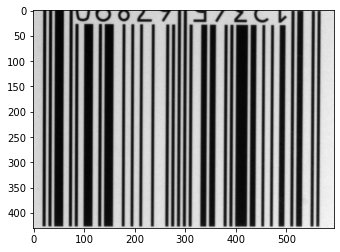

In [128]:
bound_box(f'images/{images_paths[25]}')

[[1254.  287.]
 [1279.  287.]
 [1254.  534.]
 [1279.  534.]]


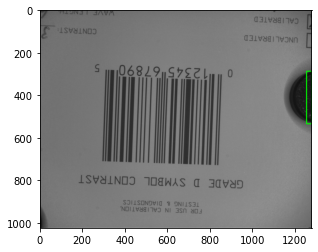

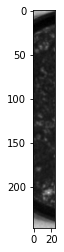

In [129]:
bound_box(f'images/{images_paths[26]}')

[[325. 292.]
 [918. 303.]
 [317. 722.]
 [911. 732.]]


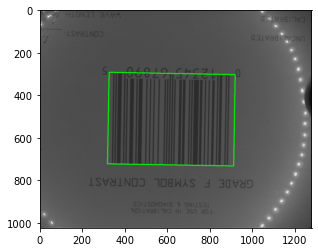

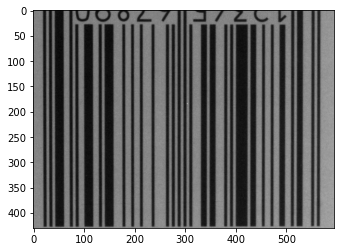

In [130]:
bound_box(f'images/{images_paths[27]}')

[[319. 296.]
 [914. 303.]
 [314. 727.]
 [910. 734.]]


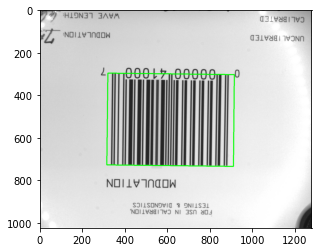

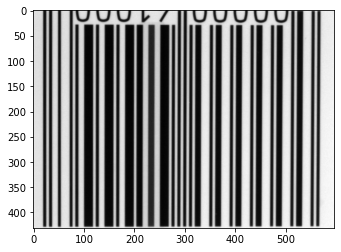

In [131]:
bound_box(f'images/{images_paths[28]}')

[[319. 301.]
 [914. 312.]
 [312. 733.]
 [907. 743.]]


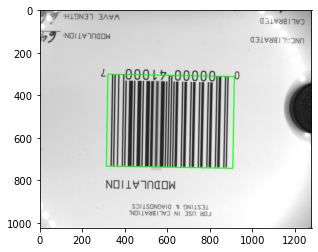

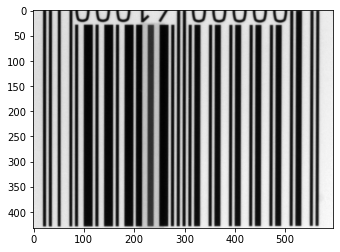

In [132]:
bound_box(f'images/{images_paths[29]}')

[[316. 312.]
 [911. 323.]
 [308. 743.]
 [903. 754.]]


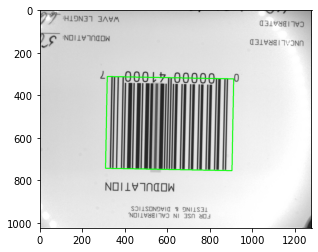

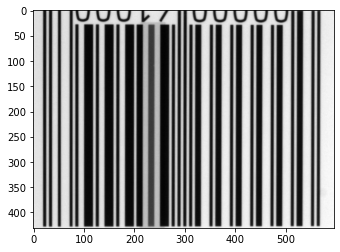

In [133]:
bound_box(f'images/{images_paths[30]}')

[[558. 345.]
 [908. 345.]
 [558. 738.]
 [908. 738.]]


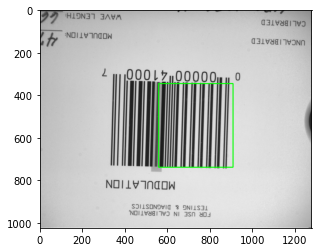

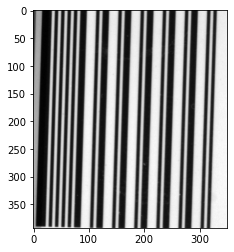

In [134]:
bound_box(f'images/{images_paths[31]}')

[[326. 293.]
 [920. 293.]
 [326. 724.]
 [920. 724.]]


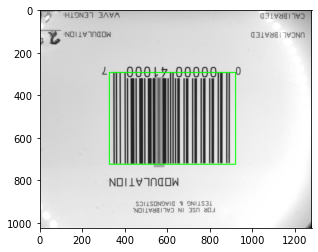

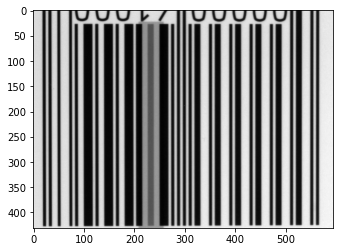

In [135]:
bound_box(f'images/{images_paths[32]}')

[[337. 300.]
 [931. 305.]
 [333. 751.]
 [927. 757.]]


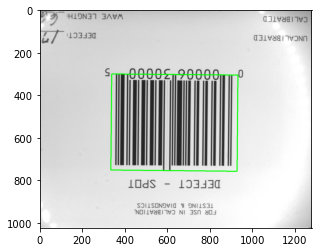

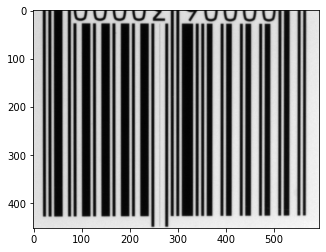

In [136]:
bound_box(f'images/{images_paths[34]}')

[[337. 290.]
 [931. 298.]
 [330. 741.]
 [925. 750.]]


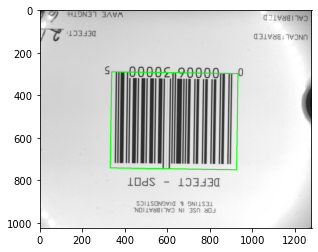

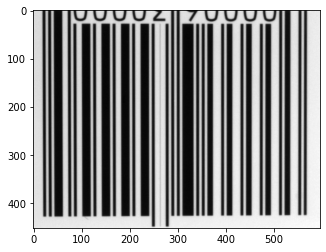

In [137]:
bound_box(f'images/{images_paths[35]}')

[[325. 295.]
 [918. 295.]
 [325. 746.]
 [918. 746.]]


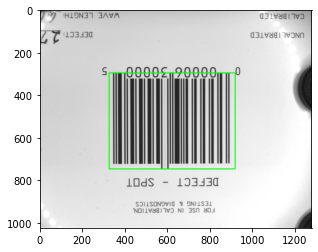

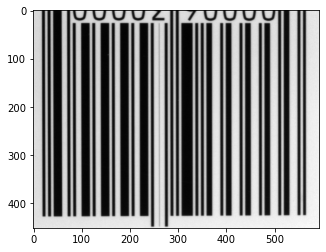

In [138]:
bound_box(f'images/{images_paths[36]}')

[[312. 301.]
 [906. 301.]
 [312. 753.]
 [906. 753.]]


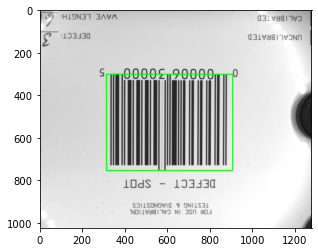

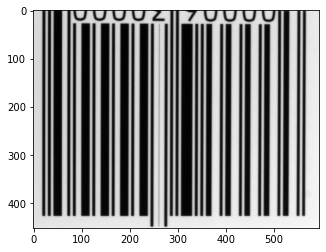

In [139]:
bound_box(f'images/{images_paths[37]}')

[[323. 301.]
 [919. 301.]
 [323. 753.]
 [919. 753.]]


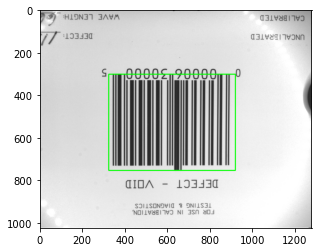

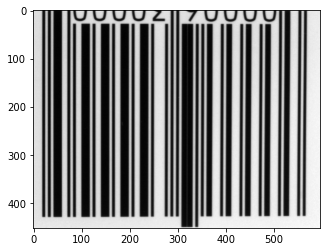

In [140]:
bound_box(f'images/{images_paths[38]}')

[[327. 293.]
 [923. 301.]
 [322. 745.]
 [917. 752.]]


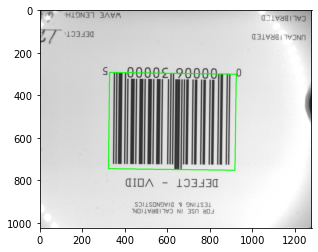

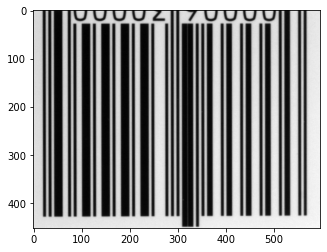

In [141]:
bound_box(f'images/{images_paths[39]}')

[[291. 303.]
 [886. 306.]
 [289. 756.]
 [884. 759.]]


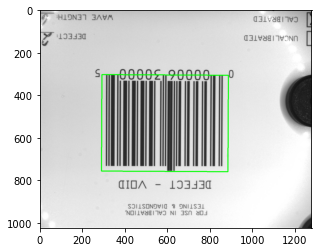

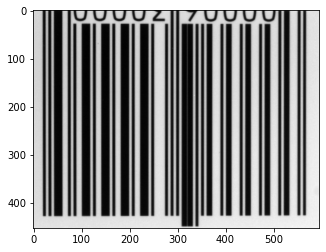

In [142]:
bound_box(f'images/{images_paths[40]}')

[[281. 297.]
 [876. 294.]
 [283. 748.]
 [878. 746.]]


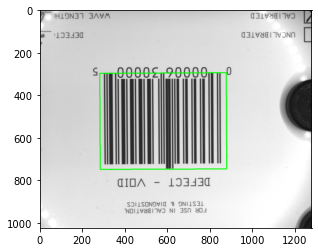

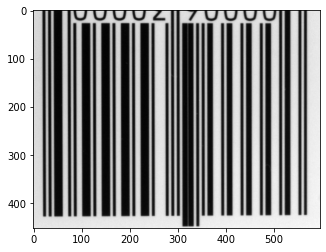

In [143]:
bound_box(f'images/{images_paths[41]}')

[[279. 294.]
 [874. 294.]
 [279. 746.]
 [874. 746.]]


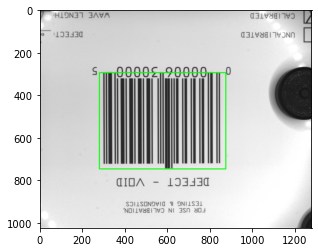

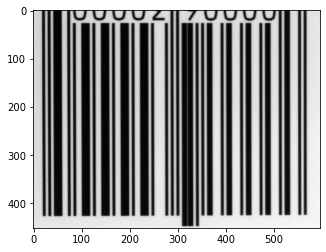

In [144]:
bound_box(f'images/{images_paths[42]}')

[[273. 288.]
 [868. 288.]
 [273. 719.]
 [868. 719.]]


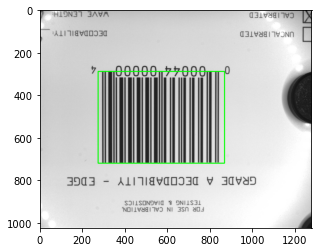

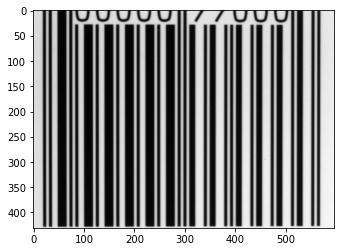

In [145]:
bound_box(f'images/{images_paths[43]}')

[[283. 294.]
 [878. 297.]
 [280. 725.]
 [876. 729.]]


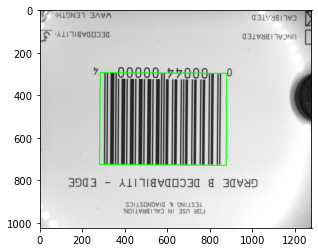

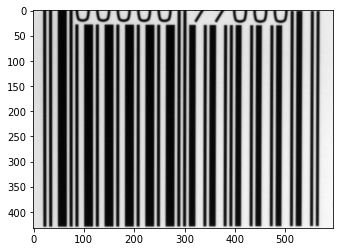

In [146]:
bound_box(f'images/{images_paths[44]}')

[[272. 306.]
 [867. 309.]
 [270. 737.]
 [865. 740.]]


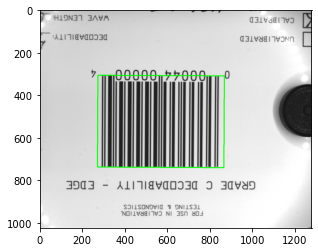

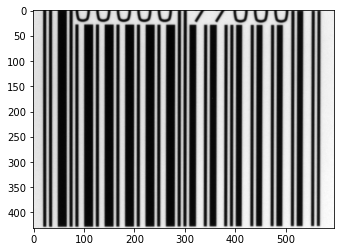

In [147]:
bound_box(f'images/{images_paths[45]}')

[[256. 295.]
 [852. 303.]
 [251. 726.]
 [846. 734.]]


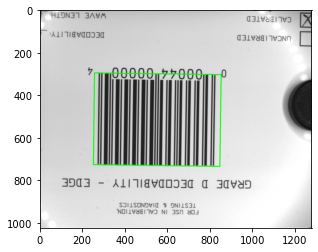

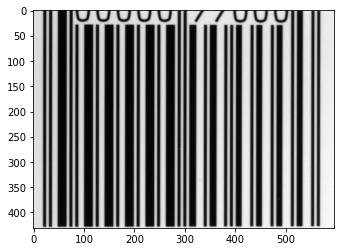

In [148]:
bound_box(f'images/{images_paths[46]}')

[[251. 303.]
 [847. 308.]
 [247. 735.]
 [843. 740.]]


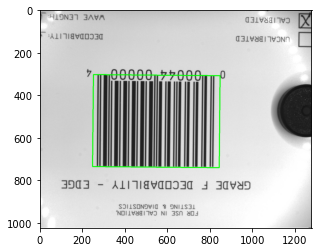

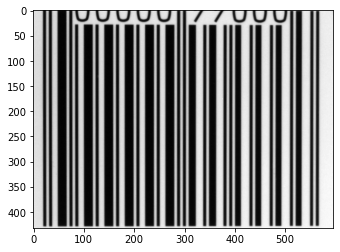

In [149]:
bound_box(f'images/{images_paths[47]}')

[[245. 302.]
 [841. 309.]
 [239. 733.]
 [835. 741.]]


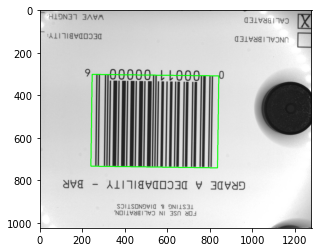

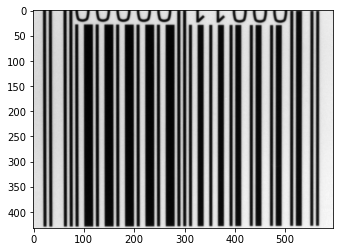

In [150]:
bound_box(f'images/{images_paths[48]}')

[[249. 302.]
 [845. 309.]
 [243. 734.]
 [840. 742.]]


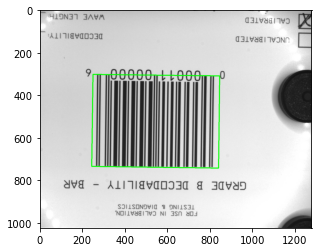

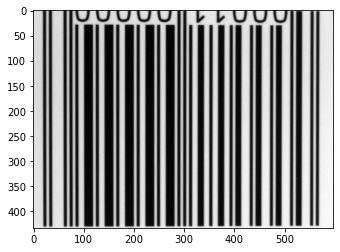

In [151]:
bound_box(f'images/{images_paths[49]}')

[[273. 280.]
 [869. 287.]
 [268. 711.]
 [863. 719.]]


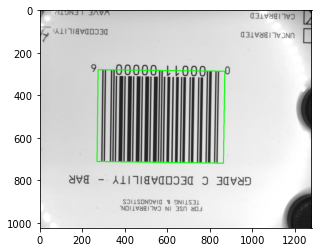

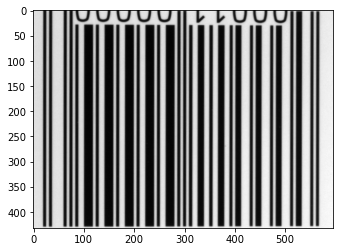

In [152]:
bound_box(f'images/{images_paths[50]}')

[[275. 290.]
 [871. 298.]
 [269. 721.]
 [865. 730.]]


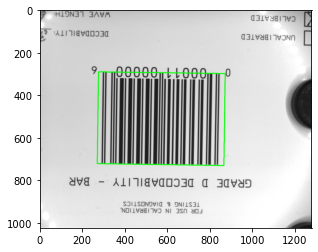

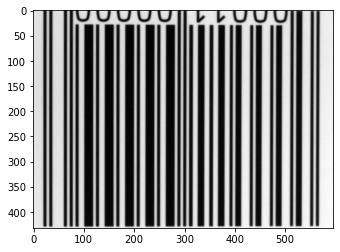

In [153]:
bound_box(f'images/{images_paths[51]}')

[[289. 294.]
 [884. 294.]
 [289. 725.]
 [884. 725.]]


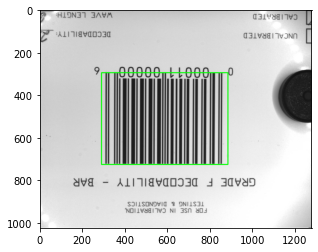

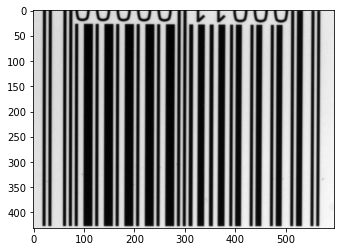

In [154]:
bound_box(f'images/{images_paths[52]}')